<a href="https://colab.research.google.com/github/kennethmao/Is-There-Really-Home-Game-Advantage/blob/main/DH_100_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Is There Really Home Court Advantage**

**Author: Kenneth Mao**

Course: Digital Humanity 100 by Dr. Adam Anderson


# Project Description

In team sports, the term home advantage, also called home-court advantage, describes the advantahe that the home team is said to gain over the visiting team. This benefit has been attributed to psychological effects supporting fans have on the competitors or referees; to psychological or physiological advantages of playing near home in familiar situations; to the disadvantages away teams suffer from changing time zones or climates, or from the rigors of trave. 

Using data from previous seasons, including the 2020 season and excluding all the playoff (post-season) games, this project will reveal if home-court advantage really exist.

# Research Question and Hypothesis

- Is home court advantage real?
- Is it more likely for a team to win if it was a home
game?
- Do teams score more for home games regardless of winning or losing?

*Hypothesis*: Home court advanrage is real; the teams are more likely to win if it is a home game; and the teams are more likely to score more for home games than away games.

# Import Libraries and Data (.csv files)

First mount to google drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries: numpy, datascience, and matplotlib

In [2]:
import numpy as np
import io
import matplotlib.pyplot as plt
import datascience 
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Read each file and assign a name for each.

In [3]:
games = Table().read_table("/content/drive/My Drive/games.csv")
teams = Table().read_table("/content/drive/My Drive/teams.csv")
players = Table().read_table("/content/drive/My Drive/players.csv")
ranking = Table().read_table("/content/drive/My Drive/ranking.csv")
detail = Table().read_table("/content/drive/My Drive/games_details.csv")

# Data Tables

The following cells will show part of each file, which allows us to choose the necessary parts.

In [4]:
games.sample(5)

GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
2006-12-04,20600254,Final,1610612747,1610612754,2006,1610612747,101,0.513,0.692,0.263,25,41,1610612754,87,0.433,0.75,0.313,24,28,1
2020-02-28,21900884,Final,1610612756,1610612765,2019,1610612756,111,0.6,0.706,0.391,31,38,1610612765,113,0.489,0.75,0.406,27,31,0
2011-03-12,21000980,Final,1610612749,1610612755,2010,1610612749,102,0.526,0.684,0.529,27,44,1610612755,74,0.397,0.75,0.375,23,34,1
2019-01-13,21800641,Final,1610612753,1610612745,2018,1610612753,116,0.482,0.893,0.375,25,45,1610612745,109,0.442,0.852,0.238,20,38,1
2009-12-18,20900374,Final,1610612737,1610612762,2009,1610612737,96,0.446,0.64,0.3,26,39,1610612762,83,0.429,0.636,0.2,24,44,1


In [5]:
teams.sample(5)

LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
0,1610612749,1968,2019,MIL,Bucks,1968,Milwaukee,Fiserv Forum,17500,Wesley Edens & Marc Lasry,Jon Horst,Mike Budenholzer,Wisconsin Herd
0,1610612758,1948,2019,SAC,Kings,1948,Sacramento,Golden 1 Center,17500,Vivek Ranadive,Vlade Divac,Luke Walton,Stockton Kings
0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,nan,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws


In [6]:
players.sample(5)

PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
Anthony Davis,1610612740,203076,2012
Lance Stephenson,1610612754,202362,2013
DeMar DeRozan,1610612761,201942,2009
Gordon Hayward,1610612762,202330,2011
Jerami Grant,1610612760,203924,2017


In [7]:
ranking.sample(5)

TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612737,0,22019,2019-10-31,East,Atlanta,5,2,3,0.4,1-2,1-1,nan
1610612750,0,22017,2017-11-14,West,Minnesota,13,8,5,0.615,4-1,4-4,nan
1610612742,0,22019,2020-04-24,West,Dallas,67,40,27,0.597,19-15,21-12,nan
1610612740,0,22019,2020-11-06,West,New Orleans,72,30,42,0.417,15-21,15-21,nan
1610612744,0,22005,2005-11-23,West,Golden State,13,7,6,0.538,4-3,3-3,nan


In [8]:
detail.sample(5)

GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
41200126,1610612737,ATL,Atlanta,201274,Ivan Johnson,nan,nan,14:54,2,5,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,-7
21000002,1610612757,POR,Portland,200746,LaMarcus Aldridge,F,nan,38:17,3,9,0.333,0,0,0,2,4,0.5,3,6,9,3,2,1,2,3,8,5
21900764,1610612752,NYK,New York,1629011,Mitchell Robinson,nan,nan,18:30,3,4,0.75,0,0,0,0,0,0,3,1,4,0,1,1,0,3,6,-5
22000864,1610612745,HOU,Houston,1629610,DaQuan Jeffries,nan,DNP - Coach's Decision,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
21000277,1610612757,POR,Portland,200750,Brandon Roy,G,nan,37:38,9,21,0.429,0,3,0,0,0,0,1,1,2,4,0,1,3,1,18,-9


The detail file and player file are not really helpful, we should disregard them from now on.

# Analysis and Visualization

First, I will find the proportion of home game win rates out of all the games won for each of the last five seasons for all the teams.

In [9]:
games_20 = games.where("SEASON", 2020)
games_19 = games.where("SEASON", 2019)
games_18 = games.where("SEASON", 2018)
games_17 = games.where("SEASON", 2017)
games_16 = games.where("SEASON", 2016)
home_game_win_rate = make_array(games_16.where("HOME_TEAM_WINS",1).num_rows/games_16.num_rows,
                                games_17.where("HOME_TEAM_WINS",1).num_rows/games_17.num_rows,
                                games_18.where("HOME_TEAM_WINS",1).num_rows/games_18.num_rows,
                                games_19.where("HOME_TEAM_WINS",1).num_rows/games_19.num_rows,
                                games_20.where("HOME_TEAM_WINS",1).num_rows/games_20.num_rows)
home_game_win_rate

array([0.58078292, 0.58248915, 0.58780842, 0.53666398, 0.54643449])

Now, I will make a ling graph to visualize the finding.

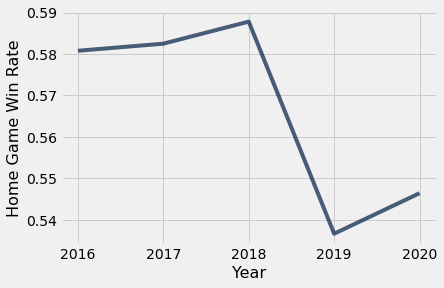

In [10]:
win_rate_table = Table().with_columns("Year",np.arange(2016,2021,1),"Home Game Win Rate", home_game_win_rate)
win_rate_table.plot("Year","Home Game Win Rate")

It appears that the proportion of games won for home games out of all the games won is greater than 50%. Which indicates that if a team wins, it is more likely that it is a home game than an away game. 

Next, I will choose data for four different teams, two from west conference and two from east conference.


West: Lakers, Jazz.

East: Nets, Heat. 

I will start with obtaining the team id for each of the four teams.

In [11]:
Lakers_id = teams.where("NICKNAME", "Lakers").column(1)
Jazz_id = teams.where("NICKNAME", "Jazz").column(1)
Nets_id = teams.where("NICKNAME", "Nets").column(1)
Heat_id = teams.where("NICKNAME", "Heat").column(1)

The following cells will show the overall win rate of Lakers for each of the past 5 seasons.

In [12]:
ranking.where("TEAM_ID", Lakers_id).where("SEASON_ID", 22020).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612747,0,22020,2021-05-25,West,L.A. Lakers,72,42,30,0.583,21-15,21-15,nan


In [13]:
ranking.where("TEAM_ID", Lakers_id).where("SEASON_ID", 22019).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612747,0,22019,2020-12-09,West,L.A. Lakers,71,52,19,0.732,25-10,27-9,nan


In [14]:
ranking.where("TEAM_ID", Lakers_id).where("SEASON_ID", 22018).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612747,0,22018,2019-09-28,West,L.A. Lakers,82,37,45,0.451,22-19,15-26,nan


In [15]:
ranking.where("TEAM_ID", Lakers_id).where("SEASON_ID", 22017).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612747,0,22017,2018-09-26,West,L.A. Lakers,82,35,47,0.427,20-21,15-26,nan


In [16]:
ranking.where("TEAM_ID", Lakers_id).where("SEASON_ID", 22016).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612747,0,22016,2017-09-28,West,L.A. Lakers,82,26,56,0.317,17-24,9-32,nan


Repeat for the three other teams.

Jazz

In [17]:
ranking.where("TEAM_ID", Jazz_id).where("SEASON_ID", 22020).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612762,0,22020,2021-05-25,West,Utah,72,52,20,0.722,31-5,21-15,nan


In [18]:
ranking.where("TEAM_ID", Jazz_id).where("SEASON_ID", 22019).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612762,0,22019,2020-12-09,West,Utah,72,44,28,0.611,23-12,21-16,nan


In [19]:
ranking.where("TEAM_ID", Jazz_id).where("SEASON_ID", 22018).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612762,0,22018,2019-09-28,West,Utah,82,50,32,0.61,29-12,21-20,nan


In [20]:
ranking.where("TEAM_ID", Jazz_id).where("SEASON_ID", 22017).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612762,0,22017,2018-09-26,West,Utah,82,48,34,0.585,28-13,20-21,nan


In [21]:
ranking.where("TEAM_ID", Jazz_id).where("SEASON_ID", 22016).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612762,0,22016,2017-09-28,West,Utah,82,51,31,0.622,29-12,22-19,nan


Nets

In [22]:
ranking.where("TEAM_ID", Nets_id).where("SEASON_ID", 22020).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612751,0,22020,2021-05-25,East,Brooklyn,72,48,24,0.667,28-8,20-16,nan


In [23]:
ranking.where("TEAM_ID", Nets_id).where("SEASON_ID", 22019).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612751,0,22019,2020-12-09,East,Brooklyn,72,35,37,0.486,20-16,15-21,1


In [24]:
ranking.where("TEAM_ID", Nets_id).where("SEASON_ID", 22018).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612751,0,22018,2019-09-28,East,Brooklyn,82,42,40,0.512,23-18,19-22,nan


In [25]:
ranking.where("TEAM_ID", Nets_id).where("SEASON_ID", 22017).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612751,0,22017,2018-09-26,East,Brooklyn,82,28,54,0.341,15-26,13-28,nan


In [26]:
ranking.where("TEAM_ID", Nets_id).where("SEASON_ID", 22016).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612751,0,22016,2017-09-28,East,Brooklyn,82,20,62,0.244,13-28,7-34,nan


Heats

In [27]:
ranking.where("TEAM_ID", Heat_id).where("SEASON_ID", 22020).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612748,0,22020,2021-05-25,East,Miami,72,40,32,0.556,21-15,19-17,nan


In [28]:
ranking.where("TEAM_ID", Heat_id).where("SEASON_ID", 22019).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612748,0,22019,2020-12-09,East,Miami,73,44,29,0.603,29-7,15-22,1


In [29]:
ranking.where("TEAM_ID", Heat_id).where("SEASON_ID", 22018).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612748,0,22018,2019-09-28,East,Miami,82,39,43,0.476,19-22,20-21,nan


In [30]:
ranking.where("TEAM_ID", Heat_id).where("SEASON_ID", 22017).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612748,0,22017,2018-09-26,East,Miami,82,44,38,0.537,26-15,18-23,nan


In [31]:
ranking.where("TEAM_ID", Heat_id).where("SEASON_ID", 22016).item(1)

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612748,0,22016,2017-09-28,East,Miami,82,41,41,0.5,23-18,18-23,nan


Using the data, we can check to see if the homegame win rates are greater than the overall win rate of each season for each team.

In the following cells, I will calculate the home game win rates using data obtained from above for each team and compare them with the overall win rate for each season.

In [32]:
#Lakers
Lakers_home = make_array(21/(21+15), 25/(25+10), 22/(22+19), 21/(20+21), 17/(17+24))
Lakers_overall = make_array(0.583, 0.732, 0.451, 0.427, 0.317)
Lakers_home > Lakers_overall

array([ True, False,  True,  True,  True])

In [33]:
#Jazz
Jazz_home = make_array(31/(31+5), 23/(23+12), 29/(29+12), 28/(28+13), 29/(29+12))
Jazz_overall = make_array(0.722, 0.611, 0.61, 0.585, 0.622)
Jazz_home > Jazz_overall

array([ True,  True,  True,  True,  True])

In [34]:
#Nets
Nets_home = make_array(28/(28+8), 20/(20+16), 23/(23+18), 15/(15+26), 13/(13+28))
Nets_overall = make_array(0.667, 0.486, 0.512, 0.341, 0.244)
Nets_home > Nets_overall

array([ True,  True,  True,  True,  True])

In [35]:
#Heat
Heat_home = make_array(21/(21+15), 29/(29+7), 19/(19+22), 26/(26+15), 23/(23+18))
Heat_overall = make_array(0.556, 0.603, 0.476, 0.537, 0.5)
Heat_home > Heat_overall

array([ True,  True, False,  True,  True])

From the comparison, 18 out of 20 seasons have home game win rate greater than the overall win rate of the same season.

To visualize this finding:

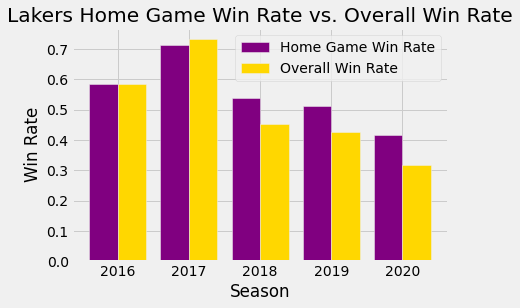

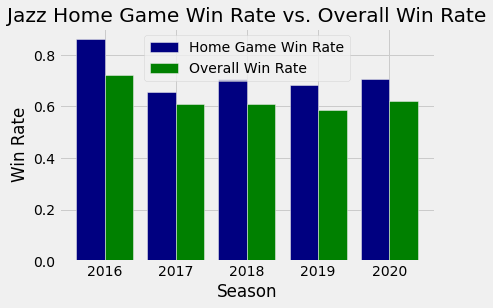

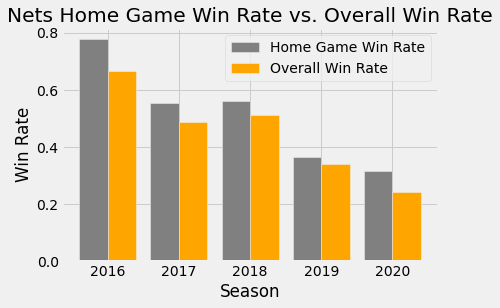

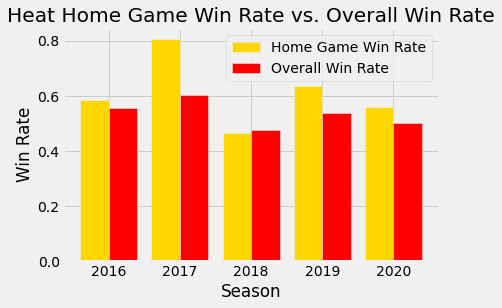

In [36]:
x = np.arange(2016,2021)
width = 0.4
plt.bar(x-0.2, Lakers_home, width, color = 'purple')
plt.bar(x+0.2, Lakers_overall, width, color = 'gold')
plt.title("Lakers Home Game Win Rate vs. Overall Win Rate")
plt.xlabel("Season")
plt.ylabel("Win Rate")
plt.legend(["Home Game Win Rate", "Overall Win Rate"])
plt.show()
plt.bar(x-0.2, Jazz_home, width, color = 'navy')
plt.bar(x+0.2, Jazz_overall, width, color = 'green')
plt.title("Jazz Home Game Win Rate vs. Overall Win Rate")
plt.xlabel("Season")
plt.ylabel("Win Rate")
plt.legend(["Home Game Win Rate", "Overall Win Rate"])
plt.show()
plt.bar(x-0.2, Nets_home, width, color = 'gray')
plt.bar(x+0.2, Nets_overall, width, color = 'orange')
plt.title("Nets Home Game Win Rate vs. Overall Win Rate")
plt.xlabel("Season")
plt.ylabel("Win Rate")
plt.legend(["Home Game Win Rate", "Overall Win Rate"])
plt.show()
plt.bar(x-0.2, Heat_home, width, color = 'gold')
plt.bar(x+0.2, Heat_overall, width, color = 'red')
plt.title("Heat Home Game Win Rate vs. Overall Win Rate")
plt.xlabel("Season")
plt.ylabel("Win Rate")
plt.legend(["Home Game Win Rate", "Overall Win Rate"])
plt.show()

Next, I will check to see if the four teams scored more points for home games than away games for each season to see if there is a correlation between home games and scoring more.

In [37]:
#Lakers
Lakers_home_20 = np.average(games.where("TEAM_ID_home", Lakers_id).where("SEASON", 2020).column("PTS_home"))
Lakers_away_20 = np.average(games.where("VISITOR_TEAM_ID", Lakers_id).where("SEASON", 2020).column("PTS_away"))
Lakers_home_19 = np.average(games.where("TEAM_ID_home", Lakers_id).where("SEASON", 2019).column("PTS_home"))
Lakers_away_19 = np.average(games.where("VISITOR_TEAM_ID", Lakers_id).where("SEASON", 2019).column("PTS_away"))
Lakers_home_18 = np.average(games.where("TEAM_ID_home", Lakers_id).where("SEASON", 2018).column("PTS_home"))
Lakers_away_18 = np.average(games.where("VISITOR_TEAM_ID", Lakers_id).where("SEASON", 2018).column("PTS_away"))
Lakers_home_17 = np.average(games.where("TEAM_ID_home", Lakers_id).where("SEASON", 2017).column("PTS_home"))
Lakers_away_17 = np.average(games.where("VISITOR_TEAM_ID", Lakers_id).where("SEASON", 2017).column("PTS_away"))
Lakers_home_16 = np.average(games.where("TEAM_ID_home", Lakers_id).where("SEASON", 2016).column("PTS_home"))
Lakers_away_16 = np.average(games.where("VISITOR_TEAM_ID", Lakers_id).where("SEASON", 2016).column("PTS_away"))
Lakers_home_all = make_array(Lakers_home_20, Lakers_home_19, Lakers_home_18, Lakers_home_17, Lakers_home_16)
Lakers_away_all = make_array(Lakers_away_20, Lakers_away_19, Lakers_away_18, Lakers_away_17, Lakers_away_16)
Lakers_home_all > Lakers_away_all

array([ True,  True, False, False,  True])

In [38]:
#Jazz
Jazz_home_20 = np.average(games.where("TEAM_ID_home", Jazz_id).where("SEASON", 2020).column("PTS_home"))
Jazz_away_20 = np.average(games.where("VISITOR_TEAM_ID", Jazz_id).where("SEASON", 2020).column("PTS_home"))
Jazz_home_19 = np.average(games.where("TEAM_ID_home", Jazz_id).where("SEASON", 2019).column("PTS_home"))
Jazz_away_19 = np.average(games.where("VISITOR_TEAM_ID", Jazz_id).where("SEASON", 2019).column("PTS_home"))
Jazz_home_18 = np.average(games.where("TEAM_ID_home", Jazz_id).where("SEASON", 2018).column("PTS_home"))
Jazz_away_18 = np.average(games.where("VISITOR_TEAM_ID", Jazz_id).where("SEASON", 2018).column("PTS_home"))
Jazz_home_17 = np.average(games.where("TEAM_ID_home", Jazz_id).where("SEASON", 2017).column("PTS_home"))
Jazz_away_17 = np.average(games.where("VISITOR_TEAM_ID", Jazz_id).where("SEASON", 2017).column("PTS_home"))
Jazz_home_16 = np.average(games.where("TEAM_ID_home", Jazz_id).where("SEASON", 2016).column("PTS_home"))
Jazz_away_16 = np.average(games.where("VISITOR_TEAM_ID", Jazz_id).where("SEASON", 2016).column("PTS_home"))
Jazz_home_all = make_array(Jazz_home_20, Jazz_home_19, Jazz_home_18, Jazz_home_17, Jazz_home_16)
Jazz_away_all = make_array(Jazz_away_20, Jazz_away_19, Jazz_away_18, Jazz_away_17, Jazz_away_16)
Jazz_home_all > Jazz_away_all

array([ True,  True,  True,  True,  True])

In [39]:
#Nets
Nets_home_20 = np.average(games.where("TEAM_ID_home", Nets_id).where("SEASON", 2020).column("PTS_home"))
Nets_away_20 = np.average(games.where("VISITOR_TEAM_ID", Nets_id).where("SEASON", 2020).column("PTS_home"))
Nets_home_19 = np.average(games.where("TEAM_ID_home", Nets_id).where("SEASON", 2019).column("PTS_home"))
Nets_away_19 = np.average(games.where("VISITOR_TEAM_ID", Nets_id).where("SEASON", 2019).column("PTS_home"))
Nets_home_18 = np.average(games.where("TEAM_ID_home", Nets_id).where("SEASON", 2018).column("PTS_home"))
Nets_away_18 = np.average(games.where("VISITOR_TEAM_ID", Nets_id).where("SEASON", 2018).column("PTS_home"))
Nets_home_17 = np.average(games.where("TEAM_ID_home", Nets_id).where("SEASON", 2017).column("PTS_home"))
Nets_away_17 = np.average(games.where("VISITOR_TEAM_ID", Nets_id).where("SEASON", 2017).column("PTS_home"))
Nets_home_16 = np.average(games.where("TEAM_ID_home", Nets_id).where("SEASON", 2016).column("PTS_home"))
Nets_away_16 = np.average(games.where("VISITOR_TEAM_ID", Nets_id).where("SEASON", 2016).column("PTS_home"))
Nets_home_all = make_array(Nets_home_20, Nets_home_19, Nets_home_18, Nets_home_17, Nets_home_16)
Nets_away_all = make_array(Nets_away_20, Nets_away_19, Nets_away_18, Nets_away_17, Nets_away_16)
Nets_home_all > Nets_away_all

array([ True, False, False, False, False])

In [40]:
#Heat
Heat_home_20 = np.average(games.where("TEAM_ID_home", Heat_id).where("SEASON", 2020).column("PTS_home"))
Heat_away_20 = np.average(games.where("VISITOR_TEAM_ID", Heat_id).where("SEASON", 2020).column("PTS_home"))
Heat_home_19 = np.average(games.where("TEAM_ID_home", Heat_id).where("SEASON", 2019).column("PTS_home"))
Heat_away_19 = np.average(games.where("VISITOR_TEAM_ID", Heat_id).where("SEASON", 2019).column("PTS_home"))
Heat_home_18 = np.average(games.where("TEAM_ID_home", Heat_id).where("SEASON", 2018).column("PTS_home"))
Heat_away_18 = np.average(games.where("VISITOR_TEAM_ID", Heat_id).where("SEASON", 2018).column("PTS_home"))
Heat_home_17 = np.average(games.where("TEAM_ID_home", Heat_id).where("SEASON", 2017).column("PTS_home"))
Heat_away_17 = np.average(games.where("VISITOR_TEAM_ID", Heat_id).where("SEASON", 2017).column("PTS_home"))
Heat_home_16 = np.average(games.where("TEAM_ID_home", Heat_id).where("SEASON", 2016).column("PTS_home"))
Heat_away_16 = np.average(games.where("VISITOR_TEAM_ID", Heat_id).where("SEASON", 2016).column("PTS_home"))
Heat_home_all = make_array(Heat_home_20, Heat_home_19, Heat_home_18, Heat_home_17, Heat_home_16)
Heat_away_all = make_array(Heat_away_20, Heat_away_19, Heat_away_18, Heat_away_17, Heat_away_16)
Heat_home_all > Heat_away_all

array([ True,  True, False,  True,  True])

From the comparison, 13 out of 20 seasons have average home games scores greater than the away games scores of the same season.

To visualize it:

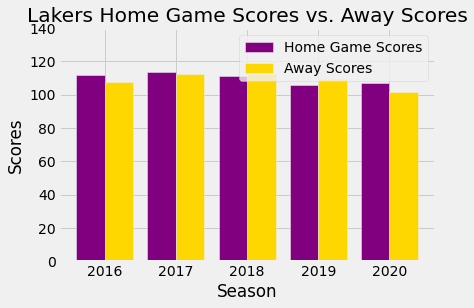

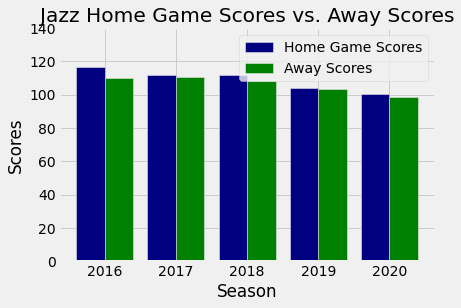

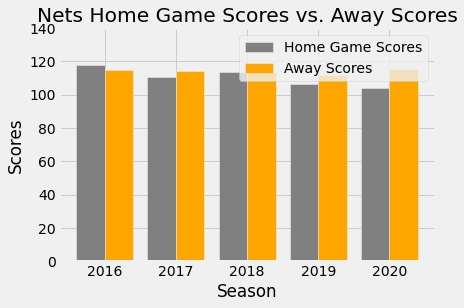

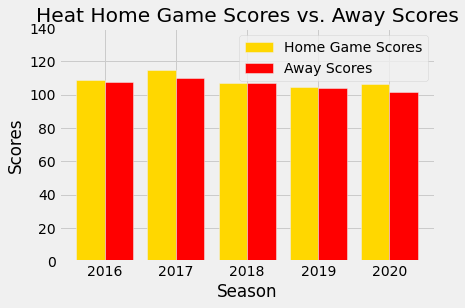

In [41]:
x = np.arange(2016,2021)
width = 0.4
plt.bar(x-0.2, Lakers_home_all, width, color = 'purple')
plt.bar(x+0.2, Lakers_away_all, width, color = 'gold')
plt.title("Lakers Home Game Scores vs. Away Scores")
plt.ylim(0,140)
plt.xlabel("Season")
plt.ylabel("Scores")
plt.legend(["Home Game Scores", "Away Scores"])
plt.show()
plt.bar(x-0.2, Jazz_home_all, width, color = 'navy')
plt.bar(x+0.2, Jazz_away_all, width, color = 'green')
plt.title("Jazz Home Game Scores vs. Away Scores")
plt.ylim(0,140)
plt.xlabel("Season")
plt.ylabel("Scores")
plt.legend(["Home Game Scores", "Away Scores"])
plt.show()
plt.bar(x-0.2, Nets_home_all, width, color = 'gray')
plt.bar(x+0.2, Nets_away_all, width, color = 'orange')
plt.title("Nets Home Game Scores vs. Away Scores")
plt.ylim(0,140)
plt.xlabel("Season")
plt.ylabel("Scores")
plt.legend(["Home Game Scores", "Away Scores"])
plt.show()
plt.bar(x-0.2, Heat_home_all, width, color = 'gold')
plt.bar(x+0.2, Heat_away_all, width, color = 'red')
plt.title("Heat Home Game Scores vs. Away Scores")
plt.ylim(0,140)
plt.xlabel("Season")
plt.ylabel("Scores")
plt.legend(["Home Game Scores", "Away Scores"])
plt.show()

Since there is not much difference between the home game scores and away scores for the teams for all the seasons, I will use t-test to check if the home game win rates is higher than the away game.

# T-test

Null hypothesis: Home game win rate is the same as away game win rate. (Win rate = 0.5)

Alternative hypothesis: Home game win rate is higher than away game win rate. (Win rate > 0.5)

P-cutoff = 0.2

First make an array with the home game win rates for all the teams.

In [42]:
home_game_win_rate = make_array(21/42,25/52,22/37,20/35,17/26,31/52,23/44,29/50,28/48,29/51,28/48,20/35,23/42,15/28,13/20,21/40,29/44,19/39,26/44,23/41)

Next, make a histogram for the win rates.

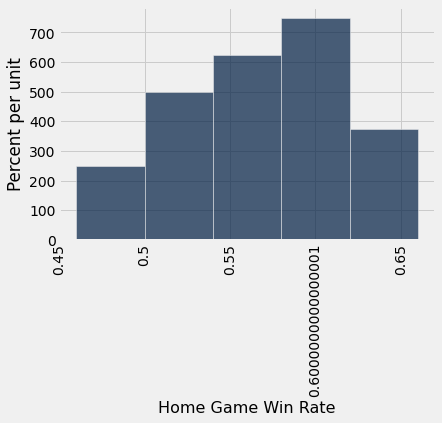

In [43]:
win_rate = Table().with_column("Home Game Win Rate", home_game_win_rate)
bins = np.arange(0.46,0.7,0.04)
win_rate.hist("Home Game Win Rate", bins=bins)

Find the proportion of data that is less than 0.5 (50% win rate) to check if we should accept or reject the null hypothesis:

In [44]:
P = win_rate.where("Home Game Win Rate", are.below(0.5)).num_rows/len(home_game_win_rate)
P

0.1

Since P < P-cutoff, we can say that home game win rate is higher than away game win rate.

# Conclusion

From the line graph and the clustered bar charts, the home game win rate seems to be higher than away game win rates iI was furthered proven by using t-test with a cut-off of 0.2, in which the althernative hypothesis was supported, where the home game win rate is higher than away game win rate. Although more than half of the seasons played have scores higher for home games than away games, there was a significant difference between the score. Therefore, it is to be concluded that home court advantage is real, but it only allows a team to have a higher chance of winning the game instead of scoring more than away games.

# References

1) .csv files with all the NBA Statistics from 2004 to 2020
seasons: https://www.kaggle.com/nathanlauga/nba-games

2) Insipiration of using NBA data for poster: Poster by Edress
Gul from Summer 2020

3) Source of the average Field Goal percentage graph:
https://weaksideawareness.wordpress.com/2012/01/12/howaggregate-nba-stats-change-through-season/

4) Reference for setting up Github:
https://github.com/AshQTan/DH100/blob/main/DH100_demo.ipynb

5) References of datascience functions:
http://data8.org/sp21/python-reference.html

6) Coding reference for making the clustered bar charts:
https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/